In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot
%matplotlib inline
import pandas as pd
from collections import defaultdict

In [2]:
# ingest data
data = pd.read_csv("paper/mutations.tsv", sep="\t", index_col=0)
data = data[["Δ log R", "emerged in lineages"]]
deltaRs = defaultdict(list)

for i in range(data.values.shape[0]):
    deltaR, lineages = data.iloc[i].values
    num_lineages = 1 + lineages.count(',')
    deltaRs[num_lineages].append(deltaR)
    
print("observed num_lineages: ", sorted(deltaRs.keys()))

# define bin boundaries
left_bin_limits = np.array([1, 6, 11, 16])
right_bin_limits = np.array([5, 10, 15, 177])
num_bins = len(left_bin_limits)

# define function to map to bins
def find_bin(i):
    result = np.argmin(i >= left_bin_limits)
    if result == 0:
        return num_bins - 1
    else:
        return result - 1

# test that find_bin is defined correctly
for i in deltaRs.keys():
    bin_i = find_bin(i)
    left, right = left_bin_limits[bin_i], right_bin_limits[bin_i]
    assert i >= left and i <= right

# bin data
binned_deltaRs = defaultdict(list)
for i in deltaRs.keys():
    bin_i = find_bin(i)
    binned_deltaRs[bin_i].extend(deltaRs[i])    

observed num_lineages:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 25, 28, 29, 38, 57, 177]


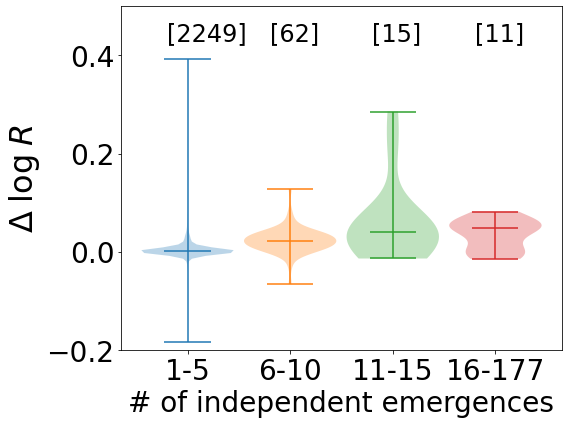

In [10]:
# make plot
f, ax = pyplot.subplots(1, 1, figsize=(8, 6))
for bin in range(num_bins):
    parts = ax.violinplot(positions=[bin], dataset=binned_deltaRs[bin], 
                          showmedians=True, widths=0.9, showextrema=True)
    ax.text(bin - 0.2, 0.43, "[{}]".format(len(binned_deltaRs[bin])), fontsize=24)
    
labels = []
for left, right in zip(left_bin_limits, right_bin_limits):
    labels.append("{}-{}".format(left, right))
ax.set_xticklabels(labels, rotation=0, fontsize=28)
ax.set_xticks(np.arange(num_bins))
ax.set_xlabel("# of independent emergences", fontsize=28)
ax.set_ylim(-0.2, 0.5)
ax.set_ylabel("$\\Delta \\;\\log\\; R$", fontsize=32)
ax.tick_params(axis='y', which='major', labelsize=28)
pyplot.tight_layout()
pyplot.savefig('ind_emergences_violin.png')